In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

# 1D TFI

1dTFIM, 4 sites, infidelity:
    lamb  count      mean       std
0     32     20  0.014762  0.004051
1     64     20  0.006376  0.001290
2    128     20  0.003485  0.001159
3    256     20  0.001795  0.000522
4    512     20  0.000883  0.000262
5   1024     20  0.000426  0.000125
6   2048     20  0.000198  0.000045
7   4096     20  0.000101  0.000033
8   8192     20  0.000058  0.000015
9  16384     20  0.000028  0.000008


1dTFIM, 4 sites, postselected infidelity:
    lamb  count          mean           std
0     32     20  8.785615e-04  2.725256e-04
1     64     20  2.668249e-04  8.088290e-05
2    128     20  5.587413e-05  1.717535e-05
3    256     20  1.872370e-05  5.784124e-06
4    512     20  4.764937e-06  1.474259e-06
5   1024     20  1.206680e-06  3.746837e-07
6   2048     20  2.881458e-07  8.948747e-08
7   4096     20  5.748360e-08  1.728352e-08
8   8192     20  1.557447e-08  4.903965e-09
9  16384     20  3.588017e-09  1.130055e-09


1dTFIM, 6 sites, infidelity:
    lamb  count 

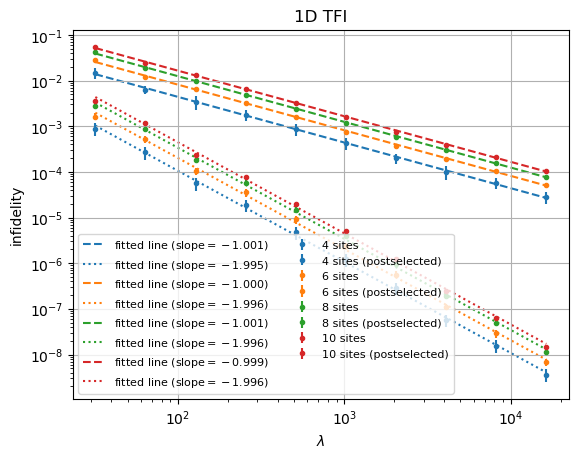

In [2]:
model = "1dTFIM"
for nb in [2,3,4,5]:
    n_logi = 2 * nb
    data_lamb, data_seed, data_infidelity, data_postsel_infidelity = [], [], [], []

    f = open(f"{model}_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, innerprod, _, postsel_innerprod = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
        data_postsel_infidelity.append(1 - abs(complex(postsel_innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "infidelity": data_infidelity,
        "postsel_infidelity": data_postsel_infidelity
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {n_logi} sites, infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{n_logi} sites',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

    newdf = df.groupby("lamb")["postsel_infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {n_logi} sites, postselected infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{n_logi} sites (postselected)',
                color=plt.gca().lines[-1].get_color(),
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle=":")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("infidelity")
plt.title("1D TFI")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
# plt.savefig(f"{model}_sweep_lamb_noise=0.1_t=1.pdf", format="pdf", bbox_inches="tight")
plt.show()

1dTFIM, 4 sites, leakage:
    lamb  count      mean       std
0     32     20  0.013896  0.003988
1     64     20  0.006110  0.001288
2    128     20  0.003429  0.001158
3    256     20  0.001777  0.000519
4    512     20  0.000879  0.000261
5   1024     20  0.000424  0.000125
6   2048     20  0.000198  0.000045
7   4096     20  0.000101  0.000033
8   8192     20  0.000058  0.000015
9  16384     20  0.000028  0.000008


1dTFIM, 6 sites, leakage:
    lamb  count      mean       std
0     32     20  0.026149  0.002321
1     64     20  0.011398  0.001182
2    128     20  0.006571  0.000657
3    256     20  0.003182  0.000300
4    512     20  0.001572  0.000151
5   1024     20  0.000761  0.000075
6   2048     20  0.000363  0.000037
7   4096     20  0.000195  0.000021
8   8192     20  0.000107  0.000009
9  16384     20  0.000053  0.000005


1dTFIM, 8 sites, leakage:
    lamb  count      mean       std
0     32     20  0.038932  0.001729
1     64     20  0.017761  0.000886
2    128     20  0

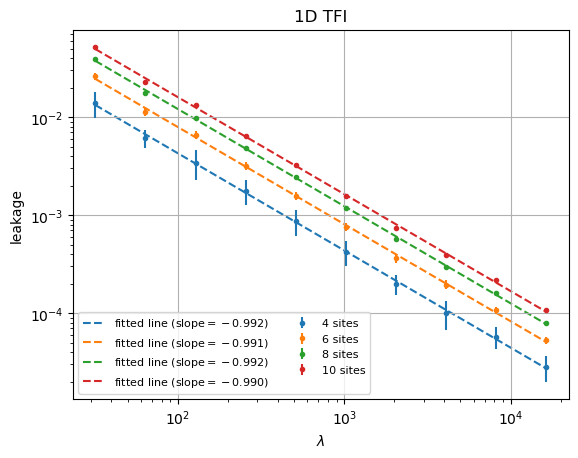

In [3]:
model = "1dTFIM"
for nb in [2,3,4,5]:
    n_logi = 2 * nb
    data_lamb, data_seed, data_leakage = [], [], []

    f = open(f"{model}_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, _, leakage, _ = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_leakage.append(float(leakage))
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "leakage": data_leakage
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["leakage"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {n_logi} sites, leakage:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{n_logi} sites',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("leakage")
plt.title("1D TFI")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
plt.show()

# 1D XY

1dXY, 4 sites, infidelity:
    lamb  count      mean       std
0     32     20  0.091730  0.020239
1     64     20  0.043156  0.009823
2    128     20  0.021298  0.006301
3    256     20  0.008180  0.001789
4    512     20  0.004091  0.000883
5   1024     20  0.002119  0.000451
6   2048     20  0.001162  0.000274
7   4096     20  0.000649  0.000217
8   8192     20  0.000236  0.000064
9  16384     20  0.000141  0.000035


1dXY, 4 sites, postselected infidelity:
    lamb  count          mean           std
0     32     20  2.324213e-02  6.283176e-03
1     64     20  6.705029e-03  2.039053e-03
2    128     20  1.573704e-03  4.146919e-04
3    256     20  4.038980e-04  1.106110e-04
4    512     20  1.025779e-04  2.890170e-05
5   1024     20  2.608218e-05  7.697338e-06
6   2048     20  6.637159e-06  2.043670e-06
7   4096     20  1.647223e-06  4.596190e-07
8   8192     20  3.513261e-07  9.198544e-08
9  16384     20  8.864442e-08  2.286207e-08


1dXY, 6 sites, infidelity:
    lamb  count      m

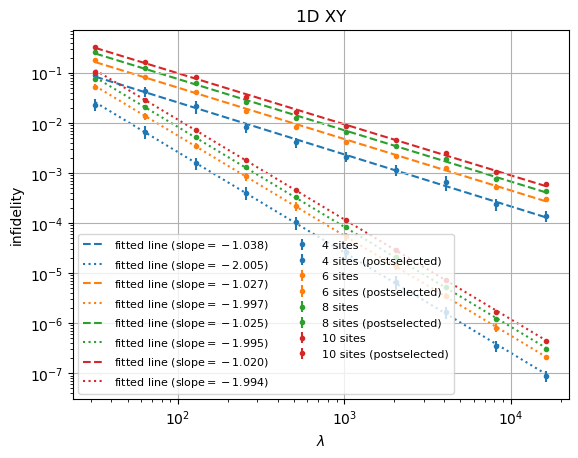

In [4]:
model = "1dXY"
for nb in [2,3,4,5]:
    n_logi = 2 * nb
    data_lamb, data_seed, data_infidelity, data_postsel_infidelity = [], [], [], []

    f = open(f"1dXZ_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, innerprod, _, postsel_innerprod = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
        data_postsel_infidelity.append(1 - abs(complex(postsel_innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "infidelity": data_infidelity,
        "postsel_infidelity": data_postsel_infidelity
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {n_logi} sites, infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{n_logi} sites',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

    newdf = df.groupby("lamb")["postsel_infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {n_logi} sites, postselected infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{n_logi} sites (postselected)',
                color=plt.gca().lines[-1].get_color(),
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle=":")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("infidelity")
plt.title("1D XY")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
# plt.savefig(f"{model}_sweep_lamb_noise=0.1_t=1.pdf", format="pdf", bbox_inches="tight")
plt.show()

1dXZ, 4 sites, leakage:
    lamb  count      mean       std
0     32     20  0.070159  0.017716
1     64     20  0.036696  0.009707
2    128     20  0.019756  0.006192
3    256     20  0.007779  0.001793
4    512     20  0.003989  0.000885
5   1024     20  0.002093  0.000452
6   2048     20  0.001155  0.000274
7   4096     20  0.000647  0.000217
8   8192     20  0.000236  0.000064
9  16384     20  0.000141  0.000035


1dXZ, 6 sites, leakage:
    lamb  count      mean       std
0     32     20  0.138148  0.013284
1     64     20  0.069739  0.006192
2    128     20  0.039065  0.003649
3    256     20  0.016193  0.001448
4    512     20  0.008192  0.000734
5   1024     20  0.004185  0.000377
6   2048     20  0.002212  0.000195
7   4096     20  0.001237  0.000109
8   8192     20  0.000530  0.000061
9  16384     20  0.000301  0.000031


1dXZ, 8 sites, leakage:
    lamb  count      mean       std
0     32     20  0.196735  0.005599
1     64     20  0.106849  0.003547
2    128     20  0.05793

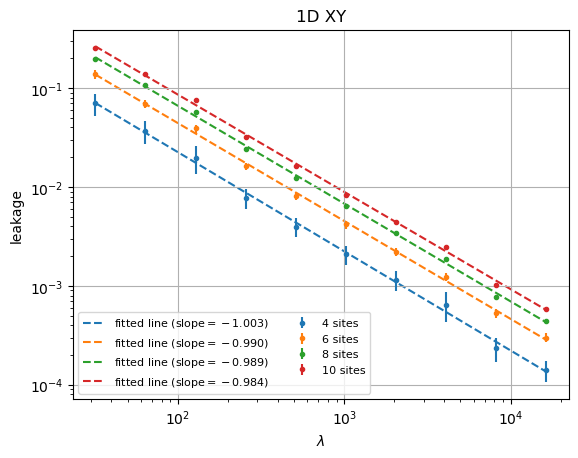

In [5]:
model = "1dXZ"
for nb in [2,3,4,5]:
    n_logi = 2 * nb
    data_lamb, data_seed, data_leakage = [], [], []

    f = open(f"{model}_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, _, leakage, _ = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_leakage.append(float(leakage))
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "leakage": data_leakage
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["leakage"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {n_logi} sites, leakage:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{n_logi} sites',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("leakage")
plt.title("1D XY")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
plt.show()

# 2D TFI

2dTFIM, 3x2 lattice, infidelity:
    lamb  count      mean       std
0     32     20  0.042550  0.003011
1     64     20  0.020640  0.001744
2    128     20  0.010142  0.000631
3    256     20  0.004813  0.000445
4    512     20  0.002389  0.000227
5   1024     20  0.001195  0.000106
6   2048     20  0.000609  0.000046
7   4096     20  0.000308  0.000022
8   8192     20  0.000150  0.000009
9  16384     20  0.000076  0.000005


2dTFIM, 3x2 lattice, postselected infidelity:
    lamb  count          mean           std
0     32     20  5.985549e-03  1.586371e-03
1     64     20  1.625404e-03  4.121657e-04
2    128     20  4.156295e-04  1.092937e-04
3    256     20  1.030380e-04  2.714329e-05
4    512     20  2.616694e-05  6.879366e-06
5   1024     20  6.643620e-06  1.731531e-06
6   2048     20  1.685222e-06  4.300117e-07
7   4096     20  4.219711e-07  1.076965e-07
8   8192     20  1.015941e-07  2.704093e-08
9  16384     20  2.625966e-08  7.040393e-09


2dTFIM, 2x4 lattice, infidelity:
    

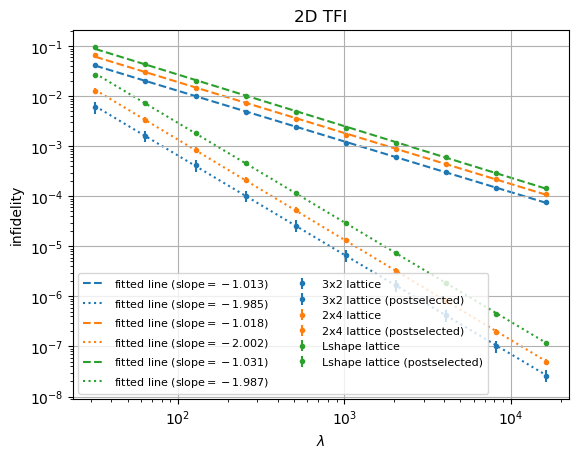

In [6]:
model = "2dTFIM"
for lattice in ["3x2", "2x4", "Lshape"]:
    data_lamb, data_seed, data_infidelity, data_postsel_infidelity = [], [], [], []

    f = open(f"{model}_sweep_lamb_{lattice}_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, innerprod, _, postsel_innerprod = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
        data_postsel_infidelity.append(1 - abs(complex(postsel_innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "infidelity": data_infidelity,
        "postsel_infidelity": data_postsel_infidelity
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {lattice} lattice, infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{lattice} lattice',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

    newdf = df.groupby("lamb")["postsel_infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {lattice} lattice, postselected infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{lattice} lattice (postselected)',
                color=plt.gca().lines[-1].get_color(),
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle=":")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("infidelity")
plt.title("2D TFI")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
# plt.savefig(f"{model}_sweep_lamb_noise=0.1_t=1.pdf", format="pdf", bbox_inches="tight")
plt.show()

2dTFIM, 3x2 lattice, leakage:
    lamb  count      mean       std
0     32     20  0.036785  0.002594
1     64     20  0.019046  0.001453
2    128     20  0.009730  0.000585
3    256     20  0.004711  0.000432
4    512     20  0.002363  0.000224
5   1024     20  0.001188  0.000105
6   2048     20  0.000608  0.000046
7   4096     20  0.000308  0.000022
8   8192     20  0.000149  0.000009
9  16384     20  0.000076  0.000005


2dTFIM, 2x4 lattice, leakage:
    lamb  count      mean       std
0     32     20  0.055607  0.001694
1     64     20  0.027115  0.001043
2    128     20  0.013928  0.000471
3    256     20  0.006984  0.000229
4    512     20  0.003414  0.000144
5   1024     20  0.001711  0.000072
6   2048     20  0.000873  0.000029
7   4096     20  0.000443  0.000015
8   8192     20  0.000224  0.000008
9  16384     20  0.000113  0.000004


2dTFIM, Lshape lattice, leakage:
    lamb  count      mean       std
0     32      5  0.072636  0.000687
1     64      5  0.036815  0.000743
2  

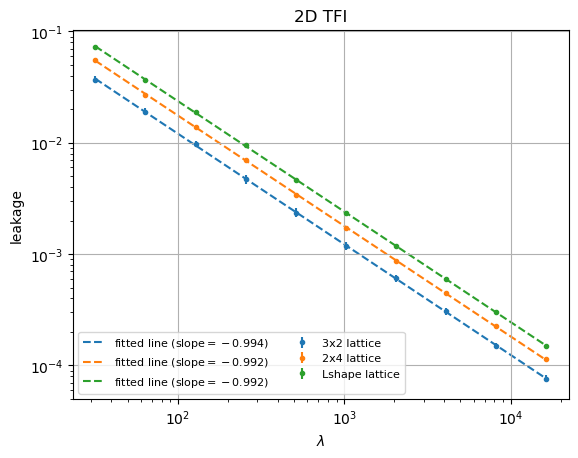

In [7]:
model = "2dTFIM"
for lattice in ["3x2", "2x4", "Lshape"]:
    data_lamb, data_seed, data_leakage = [], [], []

    f = open(f"{model}_sweep_lamb_{lattice}_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, _, leakage, _ = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_leakage.append(float(leakage))
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "leakage": data_leakage
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["leakage"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {lattice} lattice, leakage:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{lattice} lattice',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("leakage")
plt.title("2D TFI")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
plt.show()

# 2D Compass

2dCompass, 3x2 lattice, infidelity:
    lamb  count      mean       std
0     32     20  0.040106  0.002975
1     64     20  0.021392  0.001444
2    128     20  0.009664  0.000661
3    256     20  0.005568  0.000371
4    512     20  0.002779  0.000191
5   1024     20  0.001380  0.000100
6   2048     20  0.000669  0.000045
7   4096     20  0.000294  0.000019
8   8192     20  0.000139  0.000011
9  16384     20  0.000072  0.000005


2dCompass, 3x2 lattice, postselected infidelity:
    lamb  count          mean           std
0     32     20  5.703083e-03  9.967678e-04
1     64     20  1.524741e-03  2.619087e-04
2    128     20  3.866852e-04  6.553738e-05
3    256     20  9.792732e-05  1.808365e-05
4    512     20  2.451315e-05  4.491767e-06
5   1024     20  6.105519e-06  1.101950e-06
6   2048     20  1.549546e-06  2.741688e-07
7   4096     20  3.948725e-07  6.651844e-08
8   8192     20  9.959096e-08  1.790619e-08
9  16384     20  2.419698e-08  4.267213e-09


2dCompass, 2x4 lattice, infidel

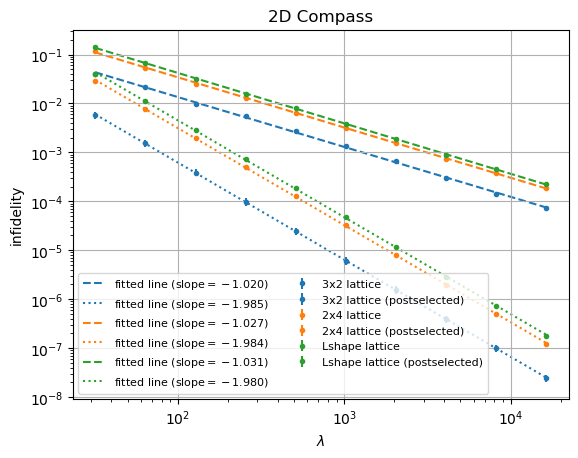

In [8]:
model = "2dCompass"
for lattice in ["3x2", "2x4", "Lshape"]:
    data_lamb, data_seed, data_infidelity, data_postsel_infidelity = [], [], [], []

    f = open(f"{model}_sweep_lamb_{lattice}_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, innerprod, _, postsel_innerprod = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
        data_postsel_infidelity.append(1 - abs(complex(postsel_innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "infidelity": data_infidelity,
        "postsel_infidelity": data_postsel_infidelity
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {lattice} lattice, infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{lattice} lattice',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

    newdf = df.groupby("lamb")["postsel_infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {lattice} lattice, postselected infidelity:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{lattice} lattice (postselected)',
                color=plt.gca().lines[-1].get_color(),
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle=":")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("infidelity")
plt.title("2D Compass")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
# plt.savefig(f"{model}_sweep_lamb_noise=0.1_t=1.pdf", format="pdf", bbox_inches="tight")
plt.show()

2dCompass, 3x2 lattice, leakage:
    lamb  count      mean       std
0     32     20  0.034602  0.002442
1     64     20  0.019898  0.001377
2    128     20  0.009281  0.000626
3    256     20  0.005470  0.000367
4    512     20  0.002754  0.000190
5   1024     20  0.001373  0.000100
6   2048     20  0.000668  0.000045
7   4096     20  0.000294  0.000019
8   8192     20  0.000139  0.000011
9  16384     20  0.000072  0.000005


2dCompass, 2x4 lattice, leakage:
    lamb  count      mean       std
0     32     20  0.090015  0.003045
1     64     20  0.046830  0.001546
2    128     20  0.023074  0.000640
3    256     20  0.012546  0.000366
4    512     20  0.006376  0.000194
5   1024     20  0.003149  0.000094
6   2048     20  0.001516  0.000046
7   4096     20  0.000726  0.000026
8   8192     20  0.000380  0.000010
9  16384     20  0.000186  0.000007


2dCompass, Lshape lattice, leakage:
    lamb  count      mean       std
0     32      5  0.108646  0.001559
1     64      5  0.055361  0.0

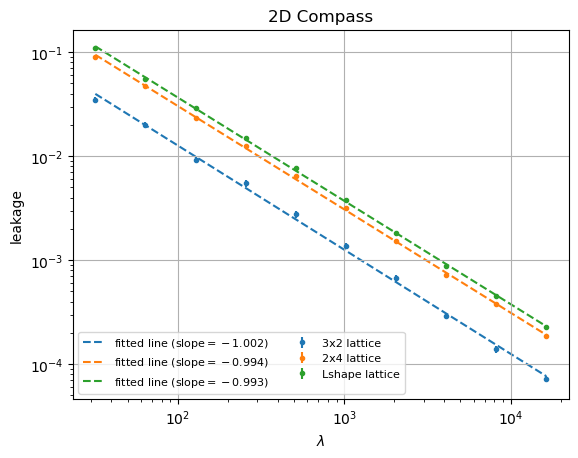

In [9]:
model = "2dCompass"
for lattice in ["3x2", "2x4", "Lshape"]:
    data_lamb, data_seed, data_leakage = [], [], []

    f = open(f"{model}_sweep_lamb_{lattice}_noise=0.1_t=1.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, _, leakage, _ = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_leakage.append(float(leakage))
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "leakage": data_leakage
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["leakage"].agg(['count', 'mean', 'std']).reset_index()
    print(f"{model}, {lattice} lattice, leakage:")
    print(newdf)
    print("\n")
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{lattice} lattice',
                fmt='o', markersize=3, zorder=2)

    lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
    plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
            label='fitted line (slope$={:.3f}$)'.format(lr.slope),
            color=plt.gca().lines[-1].get_color(),
            zorder=1,
            linestyle="--")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("leakage")
plt.title("2D Compass")
plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
plt.grid()
plt.show()

# Put Everything Togother

In [10]:
def get_data_from_file(filename):
    data_lamb, data_seed, data_infidelity = [], [], []

    f = open(filename)
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, lamb, _, seed, innerprod, _, _ = line.split()
        data_lamb.append(int(lamb))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "lamb": data_lamb,
        "seed": data_seed,
        "infidelity": data_infidelity
    })

    assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

    newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    lamb_arr = newdf["lamb"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()
    return lamb_arr, mean_arr, std_arr

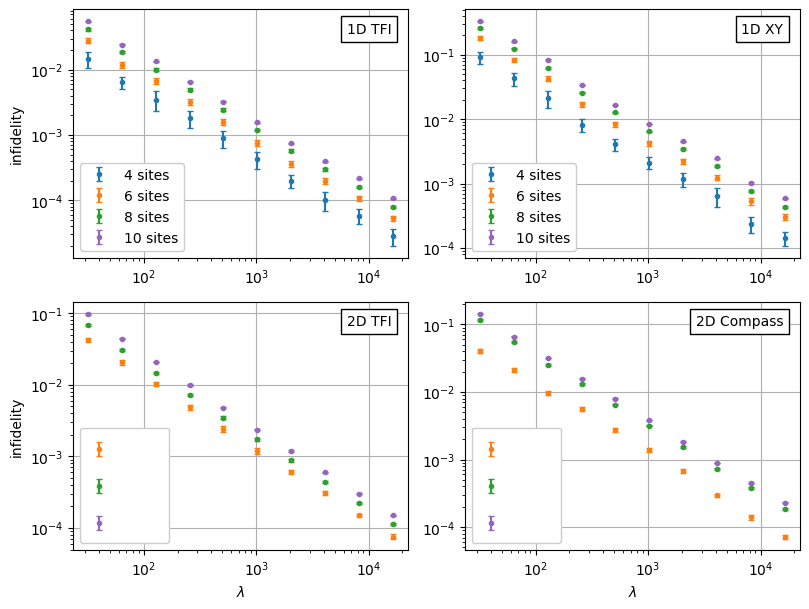

In [11]:
fig, axs = plt.subplots(2,2,figsize=(8,6))
fig.tight_layout(w_pad=1)

############################ 1d TFI ############################
ax = axs[0, 0]
for nb, color in zip([2,3,4,5], ["C0", "C1", "C2", "C4"]):
    lamb_arr, mean_arr, std_arr = get_data_from_file(f"1dTFIM_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
    ax.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{2 * nb} sites',
                color=color,
                marker='o', markersize=3, linestyle='',
                capsize=2
                )
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("infidelity")
ax.set_title("1D TFI", fontsize=10, 
             x=0.95, y=1.0, pad=-17,
             bbox=dict(facecolor='white'),
             horizontalalignment="right")
ax.grid()
ax.legend(loc="lower left", framealpha=1.0)

############################ 1d XY ############################
ax = axs[0, 1]
for nb, color in zip([2,3,4,5], ["C0", "C1", "C2", "C4"]):
    lamb_arr, mean_arr, std_arr = get_data_from_file(f"1dXZ_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
    ax.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label=f'{2 * nb} sites',
                color=color,
                marker='o', markersize=3, linestyle='',
                capsize=2
                )
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("1D XY", fontsize=10, 
             x=0.95, y=1.0, pad=-17,
             bbox=dict(facecolor='white'),
             horizontalalignment="right")
ax.grid()
ax.legend(loc="lower left", framealpha=1.0)

############################ 2d TFI ############################
ax = axs[1, 0]
for lattice, color in zip(["3x2", "2x4", "Lshape"], ["C1", "C2", "C4"]):
    lamb_arr, mean_arr, std_arr = get_data_from_file(f"2dTFIM_sweep_lamb_{lattice}_noise=0.1_t=1.txt")
    ax.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label='         \n',
                color=color,
                marker='o', markersize=3, linestyle='',
                capsize=2
                )
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel("infidelity")
ax.set_title("2D TFI", fontsize=10, 
             x=0.95, y=1.0, pad=-17,
             bbox=dict(facecolor='white'),
             horizontalalignment="right")
ax.grid()
ax.legend(loc="lower left", framealpha=1.0)

############################ 2d Compass ############################
ax = axs[1, 1]
for lattice, color in zip(["3x2", "2x4", "Lshape"], ["C1", "C2", "C4"]):
    lamb_arr, mean_arr, std_arr = get_data_from_file(f"2dCompass_sweep_lamb_{lattice}_noise=0.1_t=1.txt")
    ax.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                label='         \n',
                color=color,
                marker='o', markersize=3, linestyle='',
                capsize=2
                )
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\lambda$")
ax.set_title("2D Compass", fontsize=10, 
             x=0.95, y=1.0, pad=-17,
             bbox=dict(facecolor='white'),
             horizontalalignment="right")
ax.grid()
ax.legend(loc="lower left", framealpha=1.0)

fig.savefig("sweep_lamb.pdf", bbox_inches='tight', format="pdf")